<a href="https://colab.research.google.com/github/MasumeShariftabar/MachineLearning2023/blob/main/ML_MP1_1_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q2-1 & Q2-2

In [10]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression , SGDClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# upload data in collab from google drive
!gdown 1QH8cd1nLFo_RgUOLnICkgBNRR2QU8r4m

# place dataset in folder
import os
folder_name = "Data"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

%cd Data

#change dataset format from txt => csv
read_file = pd.read_csv (r'/content/data_banknote_authentication.txt')
headerlist = ['f1' , 'f2','f3','f4','genuine']
read_file.to_csv("/content/data_banknote_authentication.csv" ,header = headerlist)

#upload dataset as dataframe
df = pd.read_csv("/content/data_banknote_authentication.csv")

# Shuffling datas
df = shuffle(df)

X = df[['f1', 'f2', 'f3', 'f4']].values          #feature/input
y = df[['genuine']].values                       #target/otuput

# Split train test datas
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  #20% of datas go for test
df, X, y, x_train.shape, x_test.shape, y_train.shape, y_test.shape

Downloading...
From: https://drive.google.com/uc?id=1QH8cd1nLFo_RgUOLnICkgBNRR2QU8r4m
To: /content/Data/Data/Data/Data/data_banknote_authentication.txt
100% 46.4k/46.4k [00:00<00:00, 58.5MB/s]
/content/Data/Data/Data/Data/Data


(      Unnamed: 0       f1        f2       f3       f4  genuine
 534          534  1.94760  -4.77380  8.52700 -1.86680        0
 111          111  3.23510   9.64700 -3.20740 -2.59480        0
 1109        1109 -3.89520   3.81570 -0.31304 -3.81940        1
 720          720 -0.45062  -1.36780  7.08580 -0.40303        0
 726          726 -2.64790  10.13740 -1.33100 -5.47070        0
 ...          ...      ...       ...      ...      ...      ...
 1283        1283  1.20800   4.07440 -4.76350 -2.61290        1
 218          218 -1.30000  10.26780 -2.95300 -5.86380        0
 217          217 -0.16735   7.62740  1.20610 -3.62410        0
 1177        1177 -2.07540   1.27670 -0.64206 -1.26420        1
 208          208  2.17210  -0.73874  5.46720 -0.72371        0
 
 [1371 rows x 6 columns],
 array([[ 1.9476 , -4.7738 ,  8.527  , -1.8668 ],
        [ 3.2351 ,  9.647  , -3.2074 , -2.5948 ],
        [-3.8952 ,  3.8157 , -0.31304, -3.8194 ],
        ...,
        [-0.16735,  7.6274 ,  1.2061 , -3

Q2-3

In [21]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))


In [22]:
# model
def logistic_regression(x , w):
  y_hat = sigmoid(x @ w)
  return y_hat


In [23]:
def bce(y , y_hat):
  loss = -(np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
  return loss



In [24]:
def gradient(x , y  ,y_hat):
  grads = (x.T @(y_hat - y)) / len(y)
  return grads



In [33]:
def gradient_descent(w , eta , grads):
  w -= eta*grads
  return w



In [34]:
def accuracy(y , y_hat):
  acc = np.sum(y == np.round(y_hat)) / len(y)
  return acc



In [42]:
x_train = np.hstack((np.ones((len(x_train) , 1)) , x_train))
x_train.shape

(1096, 5)

In [44]:
m = 4       #number of features
w = np.random.randn(m+1 , 1)
print(w.shape)
eta = 0.01
n_epochs = 2000


(5, 1)


In [45]:
error_hist = []

for epoch in range(n_epochs):
    # prediction
    y_hat = logistic_regression(x_train , w)

    # loss
    e = bce(y_train , y_hat)
    error_hist.append(e)

    # gradients
    grads = gradient(x_train , y_train , y_hat)

    # gradient descent
    w = gradient_descent(w, eta, grads)

    # show each 100 data
    if(epoch + 1) % 100 == 0:
       print(f'Epoch = {epoch}, \t E = {e:.4}, \t w={w.T[0]}')


Epoch = 99, 	 E = 0.5011, 	 w=[-0.23403927 -0.16697414 -0.09596951  0.05391951  0.00397796]
Epoch = 199, 	 E = 0.2714, 	 w=[-0.16196924 -0.51908587 -0.23538073 -0.16203908 -0.11674525]
Epoch = 299, 	 E = 0.2109, 	 w=[-0.07868287 -0.68861279 -0.32252507 -0.27117561 -0.17916654]
Epoch = 399, 	 E = 0.1801, 	 w=[ 2.81950114e-04 -8.00674181e-01 -3.86410032e-01 -3.48746982e-01
 -2.19315843e-01]
Epoch = 499, 	 E = 0.1603, 	 w=[ 0.07396893 -0.88454607 -0.43747521 -0.41036    -0.24731354]
Epoch = 599, 	 E = 0.1461, 	 w=[ 0.14284695 -0.95163818 -0.48027003 -0.46204253 -0.26771867]
Epoch = 699, 	 E = 0.1352, 	 w=[ 0.20750695 -1.00759599 -0.51722275 -0.50682741 -0.28300125]
Epoch = 799, 	 E = 0.1263, 	 w=[ 0.26847004 -1.0556306  -0.54980097 -0.54648473 -0.29464707]
Epoch = 899, 	 E = 0.119, 	 w=[ 0.32616927 -1.09774458 -0.5789675  -0.58215126 -0.30361444]
Epoch = 999, 	 E = 0.1128, 	 w=[ 0.38096205 -1.13527156 -0.6053917  -0.61460748 -0.31055362]
Epoch = 1099, 	 E = 0.1074, 	 w=[ 0.43314534 -1.169

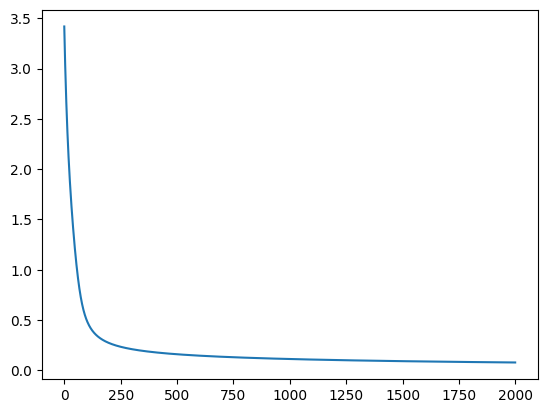

In [46]:
plt.plot(error_hist)



In [47]:
# accuracy
x_test = np.hstack((np.ones((len(x_test) , 1)), x_test))
x_test.shape


(275, 5)

In [48]:
y_hat = logistic_regression(x_test , w)
accuracy(y_test , y_hat)

0.9818181818181818

Q2-4

In [49]:
# normalized data :
max1 = df[['f1' , 'f2','f3','f4']].max()

min1 = df[['f1' , 'f2','f3','f4']].min()

for i in range(4):
  df[f'f{i+1}'] = (df[f'f{i+1}']-min1[i])/(max1[i]- min1[i])
  print(df[f'f{i+1}'])

534     0.648285
111     0.741132
1109    0.226936
720     0.475339
726     0.316884
          ...   
1283    0.594949
218     0.414087
217     0.495767
1177    0.358169
208     0.664474
Name: f1, Length: 1371, dtype: float64
534     0.336741
111     0.876347
1109    0.658148
720     0.464189
726     0.894697
          ...   
1283    0.667828
218     0.899576
217     0.800776
1177    0.563142
208     0.487727
Name: f2, Length: 1371, dtype: float64
534     0.595046
111     0.089547
1109    0.214231
720     0.532961
726     0.170379
          ...   
1283    0.022513
218     0.100506
217     0.279673
1177    0.200058
208     0.463235
Name: f3, Length: 1371, dtype: float64
534     0.607527
111     0.541331
1109    0.429981
720     0.740625
726     0.279831
          ...   
1283    0.539686
218     0.244087
217     0.447739
1177    0.662320
208     0.711466
Name: f4, Length: 1371, dtype: float64


In [50]:
X = df[['f1' , 'f2','f3','f4']].values
y = df[['genuine']].values
X , y

(array([[0.64828476, 0.33674092, 0.59504599, 0.60752703],
        [0.74113176, 0.8763466 , 0.08954703, 0.54133137],
        [0.22693609, 0.65814771, 0.21423137, 0.42998081],
        ...,
        [0.4957669 , 0.80077606, 0.27967347, 0.44773907],
        [0.35816945, 0.56314196, 0.20005773, 0.6623203 ],
        [0.6644744 , 0.48772708, 0.46323476, 0.71146603]]),
 array([[0],
        [0],
        [1],
        ...,
        [0],
        [1],
        [0]]))

Q2-5

In [57]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)
x_train.shape , x_test.shape , y_train.shape , y_test.shape


((1096, 4), (275, 4), (1096, 1), (275, 1))

In [58]:
x_train = np.hstack((np.ones((len(x_train) , 1)) , x_train))
x_train.shape


(1096, 5)

In [59]:
m = 4
w = np.random.randn(m+1 , 1)
print(w.shape)
eta = 0.01
n_epochs = 6000


(5, 1)


In [64]:
error_hist = []
for epoch in range(n_epochs):
  # prediction
  y_hat = logistic_regression(x_train , w)

  # loss
  e = bce(y_train , y_hat)
  error_hist.append(e)

  # gradients
  grads = gradient(x_train , y_train , y_hat)

  # gradient descent
  w = gradient_descent(w , eta , grads)

  # show each 100 data
  if(epoch + 1) % 100 == 0:
      print(f"Epoch = {epoch} , \t E = {e:.4} \t w={w.T[0]}")


Epoch = 99 , 	 E = 0.7825 	 w=[ 0.43729752  0.53623789  0.14734438 -0.32821039 -0.61800435]
Epoch = 199 , 	 E = 0.7326 	 w=[ 0.33092214  0.40066913  0.02783565 -0.33711049 -0.68539662]
Epoch = 299 , 	 E = 0.7111 	 w=[ 0.2815941   0.29787064 -0.05698378 -0.3305735  -0.71396847]
Epoch = 399 , 	 E = 0.6993 	 w=[ 0.2651973   0.21432795 -0.12130722 -0.31550994 -0.72034421]
Epoch = 499 , 	 E = 0.6908 	 w=[ 0.26769159  0.14213008 -0.17347412 -0.29588339 -0.71414765]
Epoch = 599 , 	 E = 0.6837 	 w=[ 0.28104341  0.07674192 -0.21827959 -0.27394388 -0.70086397]
Epoch = 699 , 	 E = 0.6771 	 w=[ 0.30063055  0.01555162 -0.25849234 -0.25097861 -0.68363981]
Epoch = 799 , 	 E = 0.6709 	 w=[ 0.32377172 -0.04295796 -0.29572514 -0.22772918 -0.66429526]
Epoch = 899 , 	 E = 0.6648 	 w=[ 0.34890202 -0.09967478 -0.33092543 -0.20462357 -0.64388872]
Epoch = 999 , 	 E = 0.659 	 w=[ 0.37510495 -0.15512182 -0.36465445 -0.1819074  -0.62303669]
Epoch = 1099 , 	 E = 0.6533 	 w=[ 0.40184309 -0.20960904 -0.39724785 -0.

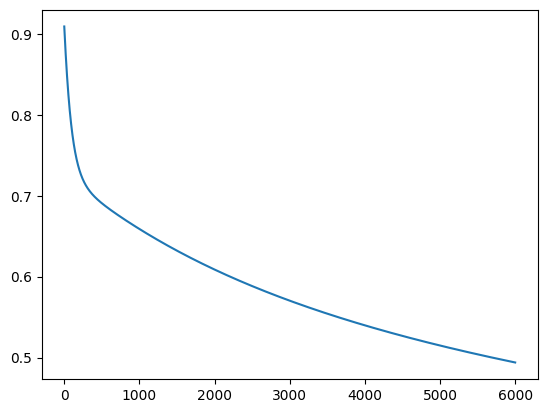

In [65]:
plt.plot(error_hist)


In [69]:
x_test = np.hstack((np.ones((len(x_test) , 1)), x_test))
x_test.shape


(275, 8)

In [70]:
y_hat = logistic_regression(x_test , w)
accuracy(y_test , y_hat)

ValueError: ignored

Q2-6

<Axes: >

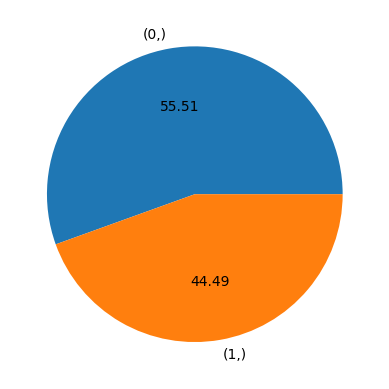

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# value_count
new_y = pd.DataFrame(y, columns=['Column_A'])
new_y.value_counts()
new_y.value_counts().plot.pie(autopct = "%.2f")

In [72]:
! pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


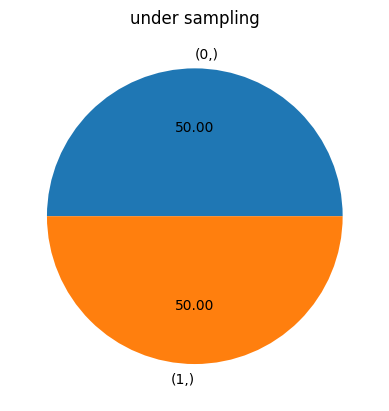

In [80]:
# undersampling
from imblearn.under_sampling import RandomUnderSampler

y = pd.DataFrame(y, columns=[''])
rus = RandomUnderSampler(sampling_strategy=1)
x_res_undersampling , y_res_undersampling = rus.fit_resample(X , y)
ax = y_res_undersampling.value_counts().plot.pie(autopct = '%.2f')
_ = ax.set_title("under sampling")

Q2-7

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = x_res_undersampling
y = y_res_undersampling
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)

In [75]:
model = LogisticRegression()
model.fit(X , y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [77]:
y_hat = model.predict(x_test)
model.score(x_test , y_test)
#y_test.shape ,
y_hat = y_hat.reshape(244 , 1)
#y_test.shape , y_hat.shape

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat)
score

0.9631147540983607

In [78]:
# Unbalanced datas
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression , SGDClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = df[["f1" ,"f2" , "f3" , "f4"]].values
y = df[["genuine"]].values
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)
model = LogisticRegression(random_state = 13, solver='sag', max_iter=200)
model.fit(X , y)
y_hat = model.predict(x_test)
model.score(x_test , y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9781818181818182